In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math as mt
import matplotlib.pylab as pylab
import ROOT
import os
import random
import MyFunction as mf
from array import array
from ROOT import TCanvas, gStyle, TFile, TProfile, TNtuple, TH1D, TH2D, TH3D, TGraph, TMultiGraph, TPad, THStack, TH1F, TLegend, gROOT 

Welcome to JupyROOT 6.21/01


### <font color=blue>Bragg Peak Graph For 6 Different Energies</font>

Coll_Energy_20MeV_Radius_3.0mm.root
458337.0
Coll_Energy_50MeV_Radius_3.0mm.root
458933.0
Coll_Energy_80MeV_Radius_3.0mm.root
458773.0
Coll_Energy_100MeV_Radius_3.0mm.root
459288.0
Coll_Energy_130MeV_Radius_3.0mm.root
461774.0
Coll_Energy_150MeV_Radius_3.0mm.root
460715.0


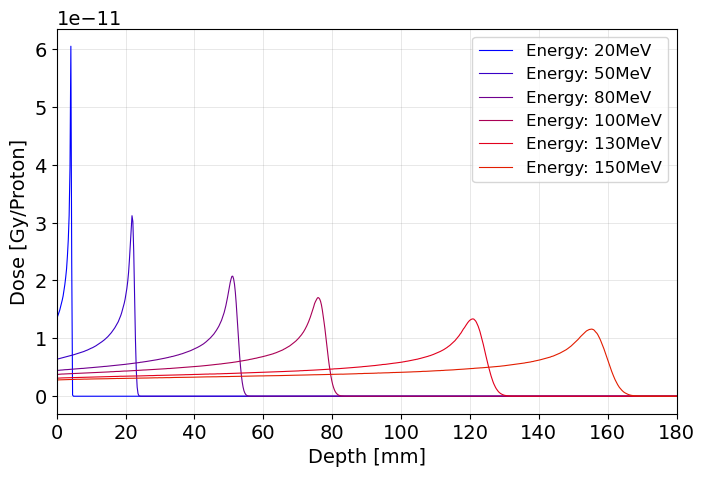

In [112]:
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Bragg Peak Graph For Different Energy/"
DataFileList = ['Coll_Energy_20MeV_Radius_3.0mm.root', 
                'Coll_Energy_50MeV_Radius_3.0mm.root', 
                'Coll_Energy_80MeV_Radius_3.0mm.root', 
                'Coll_Energy_100MeV_Radius_3.0mm.root', 
                'Coll_Energy_130MeV_Radius_3.0mm.root', 
                'Coll_Energy_150MeV_Radius_3.0mm.root']


Energy_Distribution    =  []
num_proton             =  []

for i in range(0, len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    num_proton.append(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_z"
    Distribution = Energy.Project3D("z").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)


plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.brg(np.linspace(0, 1, len(Energy_Distribution)+4))))

r = 50

for j in range (len(Energy_Distribution)): 
    radius       = r    #mm
    radiusBinMax = int(radius)
    lenght = 1/1000       #m
    mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

    EnergyHisto = Energy_Distribution[j]
    EnergyHisto.Scale(1/num_proton[j])
    Dose     = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 801):
        EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
        Dose.append(EnergyDeposit/mass)
        Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
#     lineLegend = ["Energy: 30MeV", "Energy: 50MeV", "Energy: 100MeV", "Energy: 150MeV"] 
    lineLegend = ["Energy: 20MeV", "Energy: 50MeV", "Energy: 80MeV", "Energy: 100MeV", "Energy: 130MeV", "Energy: 150MeV"] 
    plt.plot(Depth, Dose, label = lineLegend[j], linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper right')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Dose [Gy/Proton]")
    plt.xlim(0,180)
plt.savefig("/home/fardousr/Desktop/Output/Graphs/Bragg_Peak_Multi_Energy.png", dpi = 500)
plt.show()

### <font color=blue> Bragg Peak Graph For 3 Different Radii of Collimator </font>

Coll_Energy_100MeV_Radius_2.0mm.root
166100.0
Coll_Energy_100MeV_Radius_3.0mm.root
351379.0
Coll_Energy_100MeV_Radius_4.0mm.root
568126.0


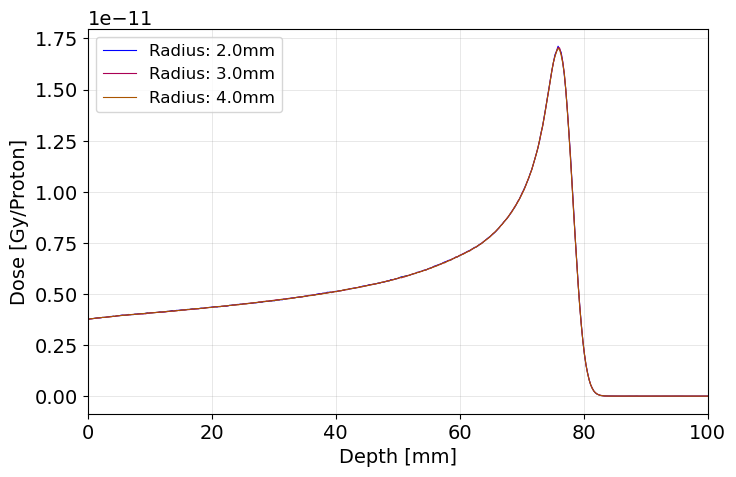

In [114]:
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Bragg Peak at 100MeV different Radius/"
DataFileList = ['Coll_Energy_100MeV_Radius_2.0mm.root', 
                'Coll_Energy_100MeV_Radius_3.0mm.root', 
                'Coll_Energy_100MeV_Radius_4.0mm.root']


Energy_Distribution    =  []
num_proton             =  []

for i in range(0, len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    num_proton.append(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_z"
    Distribution = Energy.Project3D("z").Clone(name)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)


plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.brg(np.linspace(0, 1, len(Energy_Distribution)+1))))

r = 50

for j in range (len(Energy_Distribution)): 
    radius       = r    #mm
    radiusBinMax = int(radius)
    lenght = 1/1000       #m
    mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

    EnergyHisto = Energy_Distribution[j]
    EnergyHisto.Scale(1/num_proton[j])
    Dose     = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 801):
        EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
        Dose.append(EnergyDeposit/mass)
        Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
    lineLegend = ["Radius: 2.0mm", "Radius: 3.0mm", "Radius: 4.0mm"] 
    plt.plot(Depth, Dose, label = lineLegend[j], linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper left')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Dose [Gy/Proton]")
    plt.xlim(0,100)
plt.savefig("/home/fardousr/Desktop/Output/Graphs/Bragg_Peak_Multi_Radius_Collimator.png", dpi = 500)
plt.show()

### <font color=blue> Graphs for 10 collimated beams represent physical dose</font>

Coll_Energy_150MeV_Radius_0.5mm.root
579241.0
Coll_Energy_150MeV_Radius_1.0mm.root
989047.0
Coll_Energy_150MeV_Radius_2.0mm.root
1365404.0
Coll_Energy_150MeV_Radius_3.0mm.root
1540228.0
Coll_Energy_150MeV_Radius_4.0mm.root
1636603.0
Coll_Energy_150MeV_Radius_6.0mm.root
1554116.0
Coll_Energy_150MeV_Radius_8.0mm.root
1657107.0
Coll_Energy_150MeV_Radius_10.mm.root
1724857.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file /home/fardousr/Desktop/Output/Graphs/Physical Dose 150MeV different Collimator radii.png has been created


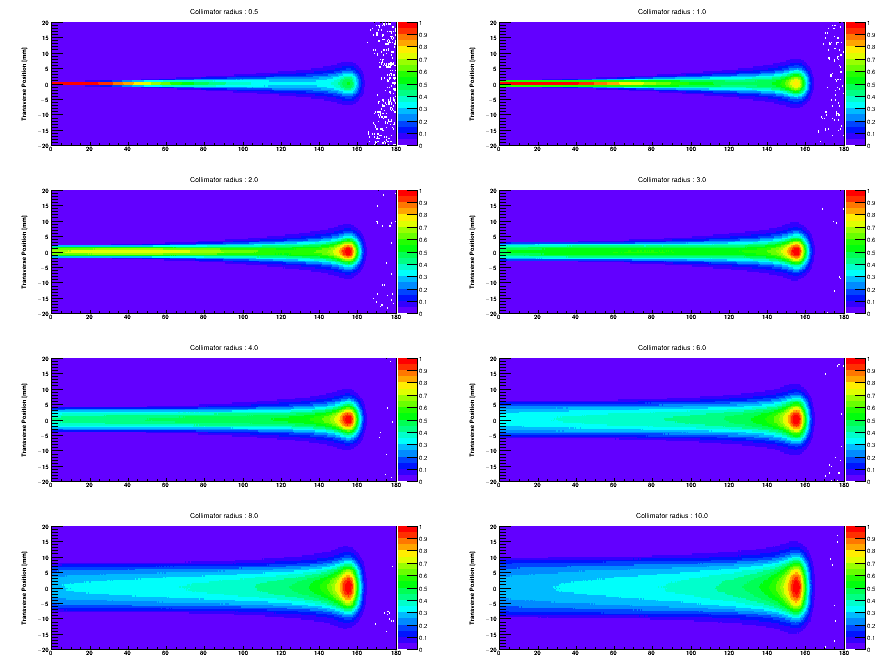

In [30]:
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"
# DataFileList = os.listdir(DataFileLocation)
# File = pd.DataFrame(DataFileList)
# print(DataFileList)
# display(File)
# DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[])

DataFileList = [ 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 
                 'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 
                 'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 
                 'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']

Energy_Distribution    =  []
num_proton             =  []

for i in range(0, len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+"/"+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    num_proton.append(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
#     RBE = RBEMatrix(file)
#     Distribution.Multiply(RBE)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)


cs = TCanvas("cs","cs", 900,700)
gStyle.SetPalette(1)
cs.Divide(2,4)
Radius = ["0.5", "1.0", "2.0", "3.0", "4.0", "6.0", "8.0", "10.0"]
for i in range(0,8):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    
    Histogram.Scale(1/num_proton[i])
    maxvalue = Histogram.GetMaximum();
    Histogram.Scale(1/maxvalue)

    Histogram.GetXaxis().SetTitle("Depth [mm]");
    Histogram.GetYaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetXaxis().CenterTitle();
    Histogram.GetYaxis().CenterTitle();
    Histogram.GetXaxis().SetRangeUser(0, 180);
    Histogram.GetYaxis().SetRangeUser(-20, 20);
    Histogram.GetXaxis().SetLabelSize(.04)
    Histogram.GetYaxis().SetLabelSize(.04)
    Histogram.GetZaxis().SetLabelSize(.04)
    Histogram.GetXaxis().SetTitleSize(.04)
    Histogram.GetYaxis().SetTitleSize(.04)
    Title = "Collimator radius : "+Radius[i]
    Histogram.SetTitleSize(.16)
    Histogram.SetStats(0)
    Histogram.SetTitle(Title)
    Histogram.Draw("COLZ")
    cs.SetRightMargin(0.9)
    cs.SetLeftMargin(0.25)
    cs.SetBottomMargin(0.25)
    cs.Modified()
    cs.Update()
    
cs.Print("/home/fardousr/Desktop/Output/Graphs/Physical Dose 150MeV different Collimator radii.png") 
cs.Draw()

### <font color=blue> LET for 6 different collimator radii</font>

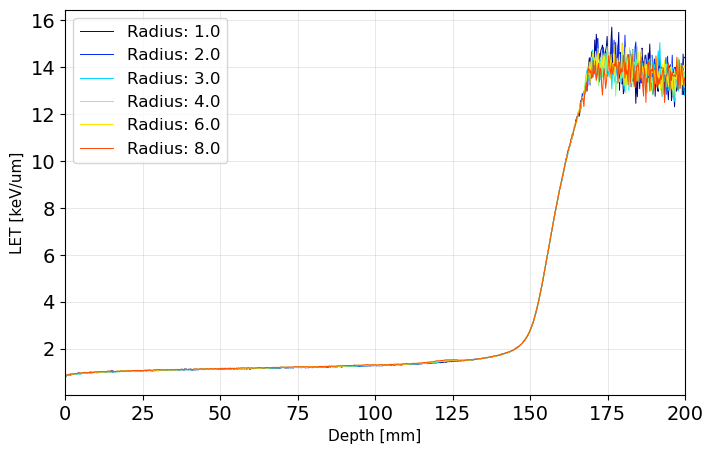

In [39]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(DataFileList)-1))))

for i in range(1, len(DataFileList)-1): 
    DataFile = ROOT.TFile(DataFileLocation+DataFileList[i])
    #DataFile = ROOT.TFile('/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_1.0mm.root')
    Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")
    Energy_ZZ = DataFile.Get('ProtonEnergyHisto').Project3D("Z")
    LETData   = DataFile.Get('LETDataHisto')
    LET       = LETData/(Energy_ZZ*1000000)
    
    maxcon = Energy_ZZ.GetBinContent(Energy_ZZ.GetMaximumBin())
    
    Dose      = array( 'd' )
    LET_Data  = array( 'd' )
    RBE       = array( 'd' )
    depth     = array( 'd' )

    for j in range(1, 801):
        Dose.append(100*Energy_ZZ.GetBinContent(j)/maxcon)
        LET_value = LET.GetBinContent(j)
        REB_value = 0.892 + (0.179*LET_value)
        LET_Data.append(LET_value)
        depth.append(LET.GetXaxis().GetBinCenter(j))
    
    lineLegend = "Radius: "+DataFileList[i][26:29]
    plt.plot(depth, LET_Data, label = lineLegend, linewidth=.7)
    plt.xlim(0, 200)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper left')
    plt.xlabel("Depth [mm]", fontsize=11)
    plt.ylabel("LET [keV/um]", fontsize=11)
plt.savefig("/home/fardousr/Desktop/Output/Graphs/LET for 150MeV 6 coll radii.png", dip = 500)    
plt.show()

### <font color=blue> LET and Dose graph</font>

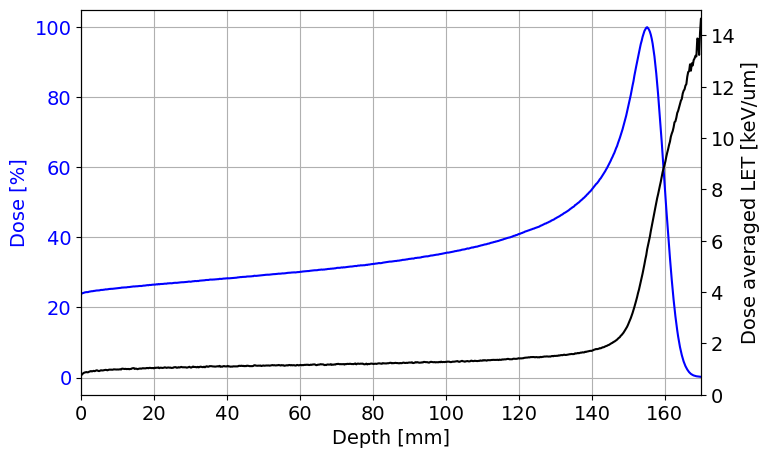

In [37]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.grid(True)
ax1.plot(depth, Dose, color='blue')

plt.xlim(0,170)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Dose averaged LET [keV/um]', color='black') 
ax2.plot(depth, LET_Data, color='black')
# ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='black')

# plt.title('Dose and Dose averaged LET')
# fig.tight_layout() 

plt.savefig("/home/fardousr/Desktop/Output/Graphs/LET and Dose Graph 150MeV coll_3mm.png", dpi = 500)
plt.show()

### <font color=blue> RBE graph for 6 different Collimator radii</font>

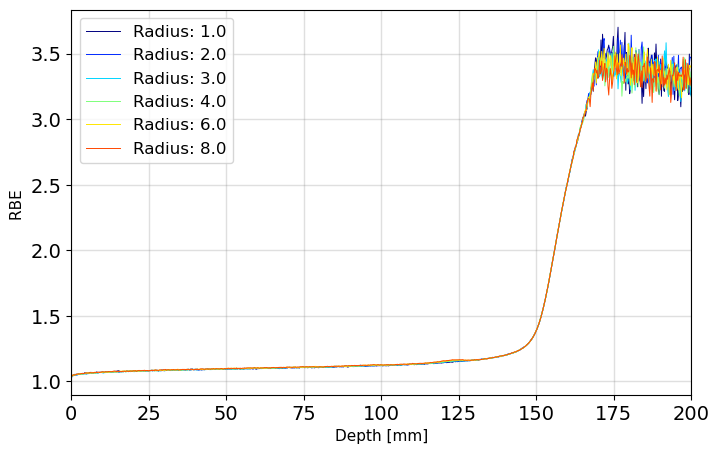

In [40]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)


DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"
DataFileList = os.listdir(DataFileLocation)
File = pd.DataFrame(DataFileList)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(DataFileList)-1))))

RBE_min = 1
c = 3.76
dose_radius = 50/1000
for i in range(1, len(DataFileList)-1): 
    DataFile = ROOT.TFile(DataFileLocation+DataFileList[i])
    #DataFile = ROOT.TFile('/home/fardousr/Desktop/Output/Collimator_Data/Without 2d letdata/Coll_Energy_150MeV_Radius_1.0mm.root')
    Energy_XZ = DataFile.Get('ProtonEnergyHisto').Project3D("XZ")
    Energy_ZZ = DataFile.Get('ProtonEnergyHisto').Project3D("Z")
    LETData   = DataFile.Get('LETDataHisto')
    LET       = LETData/(Energy_ZZ*1000000)
    
    maxcon    = Energy_ZZ.GetBinContent(Energy_ZZ.GetMaximumBin())
    Dose1      = array( 'd' )
    RBE       = array( 'd' )
    depth     = array( 'd' )

    for j in range(1, 801):
        Dose1.append(100*Energy_ZZ.GetBinContent(j)/maxcon)
        Energy = Energy_ZZ.GetBinContent(j)* 1.60218e-19
        Mass = mt.pi*dose_radius**2*Energy_ZZ.GetBinWidth(j)*997
        Dose = Energy/Mass
        LET_value = LET.GetBinContent(j)
        RBE_max_value = 0.892 + (0.179*LET_value)
        
        RBE_value = 1/(2*Dose)*(mt.sqrt(c**2 +(4*Dose*c*RBE_max_value)+(4*Dose**2*RBE_min**2)) -c)
        RBE.append(RBE_value)
        depth.append(LET.GetXaxis().GetBinCenter(j))
    
    lineLegend = "Radius: "+DataFileList[i][26:29]
    plt.plot(depth, RBE, label = lineLegend, linewidth=.7)
    plt.xlim(0, 200)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=1)
    plt.legend(loc='upper left')
    plt.xlabel("Depth [mm]", fontsize=11)
    plt.ylabel("RBE ", fontsize=11)
plt.savefig("/home/fardousr/Desktop/Output/Graphs/RBE for 150MeV 6 coll radii.png", dip = 500)    
plt.show()

### <font color=blue> RBE and Dose graph</font>

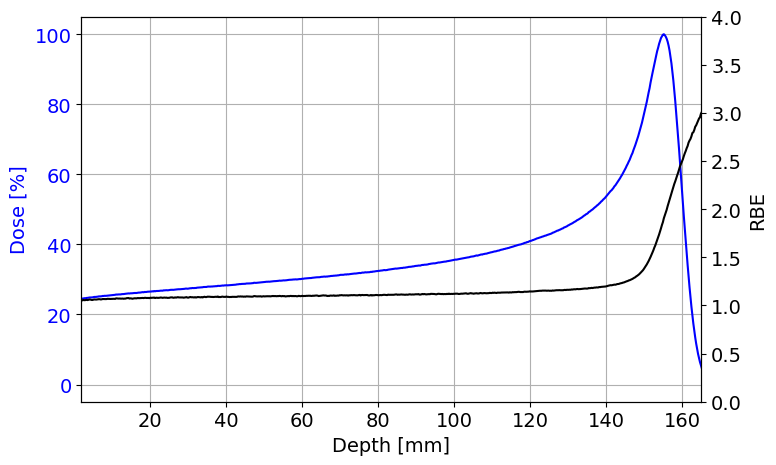

In [34]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.grid(True)
ax1.plot(depth, Dose1, color='blue')

plt.xlim(2,165)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('RBE', color='black') 
ax2.plot(depth, RBE, color='black')
plt.ylim(0,4)
ax2.tick_params(axis='y', labelcolor='black')

plt.savefig("/home/fardousr/Desktop/Output/Graphs/RBE and Dose Graph 150MeV coll_3mm.png", dpi = 500)
plt.show()

### <font color=blue> Graphs for 10 collimated beams represent Biological dose</font>

Coll_Energy_150MeV_Radius_0.5mm.root
579241.0
Coll_Energy_150MeV_Radius_1.0mm.root
989047.0
Coll_Energy_150MeV_Radius_2.0mm.root
1365404.0
Coll_Energy_150MeV_Radius_3.0mm.root
1540228.0
Coll_Energy_150MeV_Radius_4.0mm.root
1636603.0
Coll_Energy_150MeV_Radius_6.0mm.root
1554116.0
Coll_Energy_150MeV_Radius_8.0mm.root
1657107.0
Coll_Energy_150MeV_Radius_10.mm.root
1724857.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Info in <TCanvas::Print>: png file /home/fardousr/Desktop/Output/Graphs/Biological Dose 150MeV different Collimator radii.png has been created


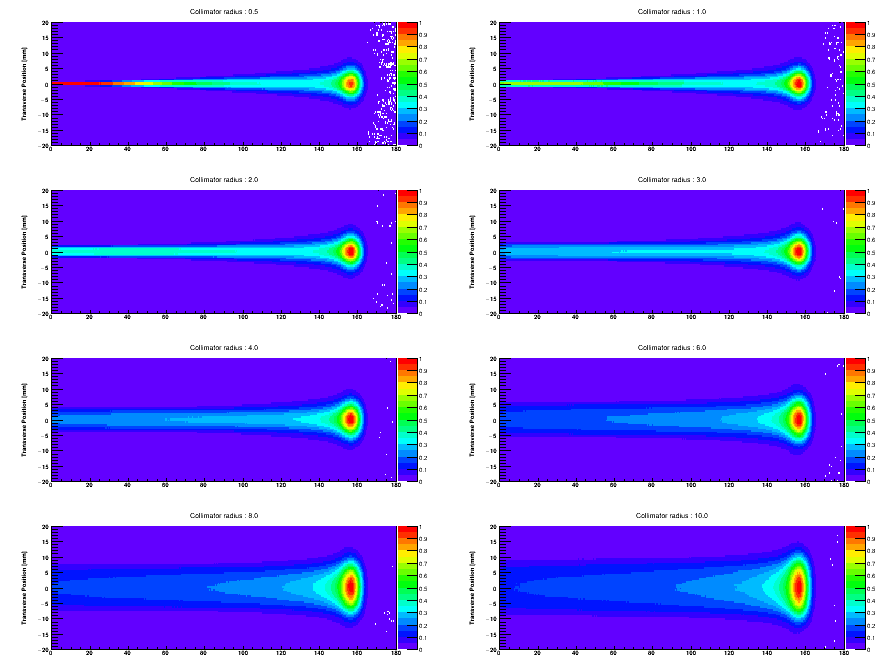

In [31]:
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"
# DataFileList = os.listdir(DataFileLocation)
# File = pd.DataFrame(DataFileList)
# print(DataFileList)
# display(File)
# DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[])

DataFileList = [ 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 
                 'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 
                 'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 
                 'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']

Energy_Distribution    =  []
num_proton             =  []

for i in range(0, len(DataFileList)):
    print(DataFileList[i])
    file = DataFileLocation+"/"+DataFileList[i]
    DataFile = ROOT.TFile(file)
    NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
    print(NumProton)
    num_proton.append(NumProton)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.Project3D("xz").Clone(name)
    RBE = mf.RBEMatrix(file)
    Distribution.Multiply(RBE)
    Distribution.SetDirectory(0)
    Energy_Distribution.append(Distribution)


cs = TCanvas("cs","cs", 900,700)
gStyle.SetPalette(1)
cs.Divide(2,4)
Radius = ["0.5", "1.0", "2.0", "3.0", "4.0", "6.0", "8.0", "10.0"]
for i in range(0,8):
    cs.cd(i+1);
    cs.SetFillColor( 0 )
    cs.GetFrame().SetFillColor( 21 )
    cs.GetFrame().SetBorderSize( 6 )
    cs.GetFrame().SetBorderMode( -1 )
    
    Histogram = Energy_Distribution[i]
    
    Histogram.Scale(1/num_proton[i])
    maxvalue = Histogram.GetMaximum();
    Histogram.Scale(1/maxvalue)

    Histogram.GetXaxis().SetTitle("Depth [mm]");
    Histogram.GetYaxis().SetTitle("Transverse Position [mm]");
    Histogram.GetXaxis().CenterTitle();
    Histogram.GetYaxis().CenterTitle();
    Histogram.GetXaxis().SetRangeUser(0, 180);
    Histogram.GetYaxis().SetRangeUser(-20, 20);
    Histogram.GetXaxis().SetLabelSize(.04)
    Histogram.GetYaxis().SetLabelSize(.04)
    Histogram.GetZaxis().SetLabelSize(.04)
    Histogram.GetXaxis().SetTitleSize(.04)
    Histogram.GetYaxis().SetTitleSize(.04)
    Title = "Collimator radius : "+Radius[i]
    Histogram.SetTitleSize(.16)
    Histogram.SetStats(0)
    Histogram.SetTitle(Title)
    Histogram.Draw("COLZ")
    cs.SetRightMargin(0.9)
    cs.SetLeftMargin(0.25)
    cs.SetBottomMargin(0.25)
    cs.Modified()
    cs.Update()
    
cs.Print("/home/fardousr/Desktop/Output/Graphs/Biological Dose 150MeV different Collimator radii.png") 
cs.Draw()

### <font color=blue> Dose for different radii of the cylinder </font>

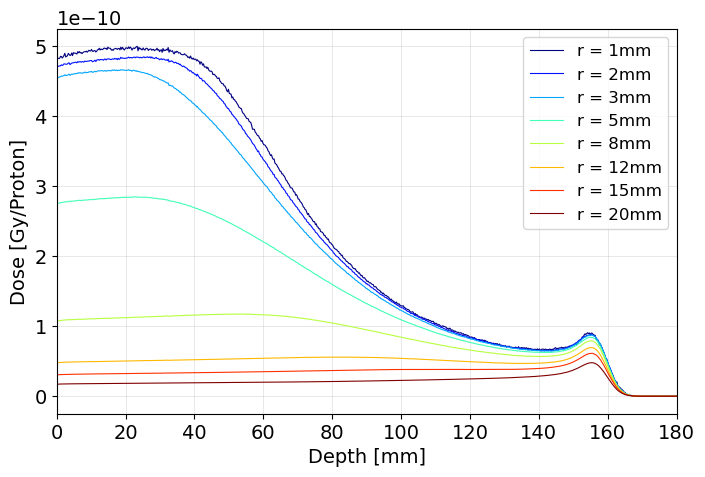

In [18]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 8))))

#DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[2])
DataFile    = ROOT.TFile("/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/Coll_Energy_150MeV_Radius_1.0mm.root")
NumProton = DataFile.Get('ParticelCounter').GetBinContent(1)
r = [1, 2, 3, 5, 8, 12, 15, 20]

for j in range (len(r)): 
    radius       = r[j]     #mm
    radiusBinMax = int(radius)
    lenght = 1/1000       #m
    mass = mt.pi*(radius/1000)**2*lenght*997 #kg/m3 

    EnergyHisto = DataFile.Get('ProtonRadialHisto').ProjectionX("X", 1, radiusBinMax)

    Dose     = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 801):
        EnergyDeposit = EnergyHisto.GetBinContent(i)*1.60218*10**-19  #J
        Dose.append(EnergyDeposit/(mass*NumProton))
        Depth.append(EnergyHisto.GetXaxis().GetBinCenter(i)) 
    lineLegend = "r = "+str(r[j])+"mm" 
    plt.plot(Depth, Dose, label = lineLegend, linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='upper right')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Dose [Gy/Proton]")
    plt.xlim(0,180)
# plt.savefig("/home/fardousr/Desktop/Output/Graphs/Dose at central axis 6 radii 150MeV  callimator 1mm.png", dpi = 500)

plt.savefig("/home/fardousr/Desktop/Output/Graphs/D.png", dpi = 500)
plt.show()

### <font color=blue> Fluence for different radii of the cylinder </font>

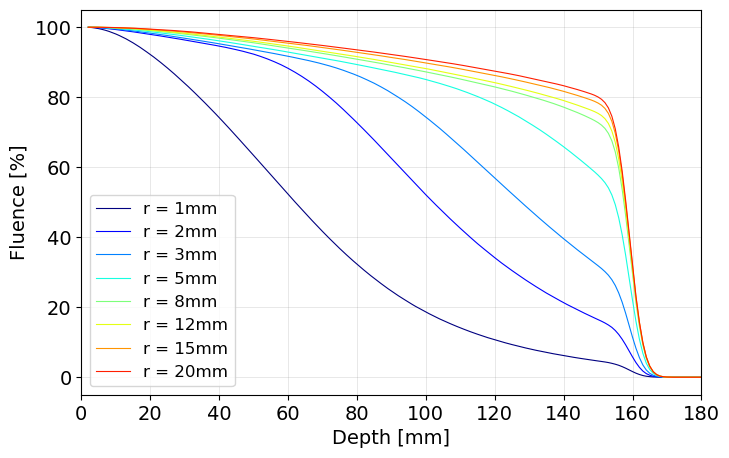

In [17]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 9))))

#DataFile = ROOT.TFile(DataFileLocation+"/"+DataFileList[2])
r = [1, 2, 3, 5, 8, 12, 15, 20]

FluenceList =['Proton1Fluence', 'Proton2Fluence', 'Proton3Fluence', 'Proton5Fluence','Proton8Fluence','Proton10Fluence', 'Proton15Fluence', 'Proton20Fluence']

for j in range (len(FluenceList)): 

    Fluence = DataFile.Get(FluenceList[j])

    Num      = array( 'd' )
    Depth    = array( 'd' )

    for i in range(1, 201):
        maxbin = Fluence.GetMaximumBin()
        n = Fluence.GetBinContent(i)/Fluence.GetBinContent(maxbin) 
        Num.append(n*100)
        Depth.append(i+1) 
    lineLegend = "r = "+str(r[j])+"mm" 
    plt.plot(Depth, Num, label = lineLegend, linewidth=0.8)
    plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
    plt.legend(loc='lower left')
    plt.xlabel("Depth [mm]")
    plt.ylabel("Fluence [%]")
    plt.xlim(0, 180)
# plt.savefig("/home/fardousr/Desktop/Output/Graphs/Fluence 6 radii 150MeV  callimator 1mm.png", dpi = 500)
plt.savefig("/home/fardousr/Desktop/Output/Graphs/F.png", dpi = 500)
plt.show()

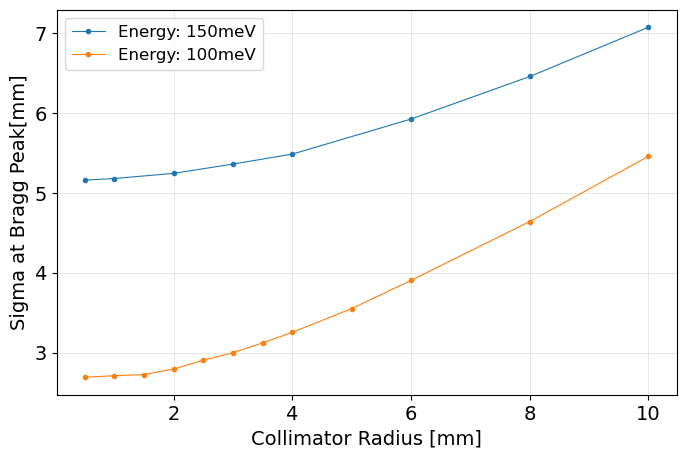

In [31]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"

DataFileList = [ 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 
                 'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 
                 'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 
                 'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']

r150                   = [0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0] 
sigma_BP_150MeV        =  []

for i in range(0, len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 152*4, 155*4).Clone(name)
    sigma_BP_150MeV.append(Distribution.GetStdDev())

    
DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Beam 100MeV//"

DataFileList = ['Coll_Energy_100MeV_Radius_0.5mm.root', 'Coll_Energy_100MeV_Radius_1.0mm.root', 
                'Coll_Energy_100MeV_Radius_1.5mm.root', 'Coll_Energy_100MeV_Radius_2.0mm.root', 
                'Coll_Energy_100MeV_Radius_2.5mm.root', 'Coll_Energy_100MeV_Radius_3.0mm.root', 
                'Coll_Energy_100MeV_Radius_3.5mm.root', 'Coll_Energy_100MeV_Radius_4.0mm.root', 
                'Coll_Energy_100MeV_Radius_5.0mm.root', 'Coll_Energy_100MeV_Radius_6.0mm.root', 
                'Coll_Energy_100MeV_Radius_8.0mm.root', 'Coll_Energy_100MeV_Radius_10.mm.root']

r100 = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 8.0, 10.0]
sigma_BP_100MeV        =  []

for i in range(0, len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 72*4, 78*4).Clone(name)
    sigma_BP_100MeV.append(Distribution.GetStdDev())
    
plt.plot(r150, sigma_BP_150MeV,'.-', label = 'Energy: 150meV', linewidth=0.8)
plt.plot(r100, sigma_BP_100MeV,'.-', label = 'Energy: 100meV', linewidth=0.8)
plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
plt.legend(loc='upper left')
plt.xlabel("Collimator Radius [mm]")
plt.ylabel("Sigma at Bragg Peak[mm]")
plt.savefig("/home/fardousr/Desktop/Output/Graphs/Beam sigma at BP with collimattor radius.png", dpi = 500)
plt.show()

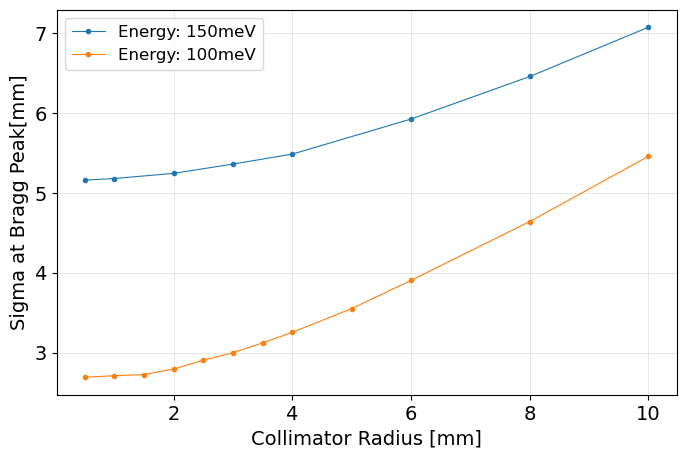

In [30]:
plt.plot(r150, sigma_BP_150MeV,'.-', label = 'Energy: 150meV', linewidth=0.8)
plt.plot(r100, sigma_BP_100MeV,'.-', label = 'Energy: 100meV', linewidth=0.8)
plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
plt.legend(loc='upper left')
plt.xlabel("Collimator Radius [mm]")
plt.ylabel("Sigma at Bragg Peak[mm]")
plt.show()


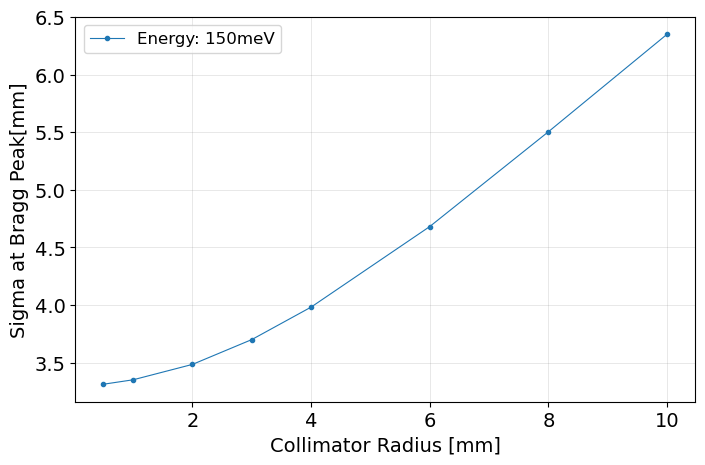

 FCN=274037 FROM HESSE     STATUS=OK             20 CALLS         106 TOTAL
                     EDM=3.01851e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.30401e+11   1.29104e+08   1.09864e+05  -6.35779e-15
   2  Mean         1.56342e-03   1.41239e-03   3.61011e-04  -2.45884e-04
   3  Sigma        3.31349e+00   1.30474e-03   1.95834e-05  -2.43394e-01
 FCN=458528 FROM HESSE     STATUS=OK             16 CALLS         120 TOTAL
                     EDM=5.25616e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.89756e+11   1.66650e+08   9.29252e+04  -9.70909e-15
   2  Mean        -3.38833e-03   1.09182e-03   1.44398e-05   3.62794e-04
   3  Sigma        3.35189e+00   1.

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [3]:
plt.rcdefaults()
params = {'figure.figsize'   : (8, 5),
          'legend.fontsize'  : 12,
          'axes.labelsize'   : 14,
          'axes.titlesize'   : 14,
          'xtick.labelsize'  : 14,
          'ytick.labelsize'  : 14,
          'axes.facecolor'   : 'white'}
pylab.rcParams.update(params)

DataFileLocation = "/home/fardousr/Desktop/Output/Collimator_Data/Energy Histogram 150MeV/"

DataFileList = [ 'Coll_Energy_150MeV_Radius_0.5mm.root', 'Coll_Energy_150MeV_Radius_1.0mm.root', 
                 'Coll_Energy_150MeV_Radius_2.0mm.root', 'Coll_Energy_150MeV_Radius_3.0mm.root', 
                 'Coll_Energy_150MeV_Radius_4.0mm.root', 'Coll_Energy_150MeV_Radius_6.0mm.root', 
                 'Coll_Energy_150MeV_Radius_8.0mm.root', 'Coll_Energy_150MeV_Radius_10.mm.root']

r150                   = [0.5, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 10.0] 
sigma_BP_150MeV        =  []

for i in range(0, len(DataFileList)):
    file = DataFileLocation+DataFileList[i]
    DataFile = ROOT.TFile(file)
    Energy = DataFile.Get('ProtonEnergyHisto').Clone("Alpha_"+str(i))
    Energy.SetDirectory(0)
    name = DataFileList[i]+"_xz"
    Distribution = Energy.ProjectionY(name, -200, 200, 152*4, 155*4).Clone(name)
    Distribution.Fit("gaus", "M", "SAME")
    parameter = Distribution.GetListOfFunctions().FindObject("gaus");
    sigma = parameter.GetParameter(2)
    sigma_BP_150MeV.append(sigma)

plt.plot(r150, sigma_BP_150MeV,'.-', label = 'Energy: 150meV', linewidth=0.8)
plt.grid(alpha =0.25, axis='both' , color='gray', linestyle='-', linewidth=.5)
plt.legend(loc='upper left')
plt.xlabel("Collimator Radius [mm]")
plt.ylabel("Sigma at Bragg Peak[mm]")
#plt.savefig("/home/fardousr/Desktop/Output/Graphs/Beam sigma at BP with collimattor radius.png", dpi = 500)
plt.show()